In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data'
df = pd.read_csv(path, sep = '\t')
df.shape

(442, 11)

In [3]:
#Print dataframe
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
#Describe dataframe
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 1 - Prep the data in order to be ready to be fed to a model.
### 1.1) Look for missing, null, NaN records.

In [5]:
# check if dataframe has any null values
df.isnull().values.any()


False

In [6]:
# to check each column value - returns true if null value exists
df.isna()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# above we not able to visualize whole dataset, so check for count of null value
df.isnull().sum()
# output is zero - no missing or null values

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [8]:
# Returns non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [9]:
# to get the columns with null value if any
df.columns[df.isnull().any()]

Index([], dtype='object')

### 1.2 ) Find outliers.

In [10]:
# Separate features
features = df.drop(['Y'], axis = 1)
features 

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [11]:
# find the label - not required
label = df['Y']
label

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

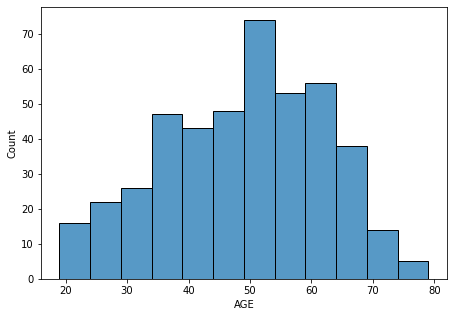

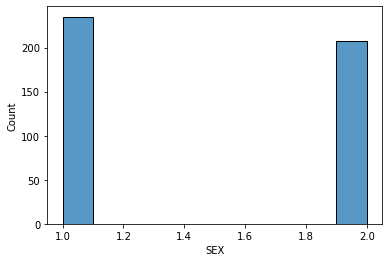

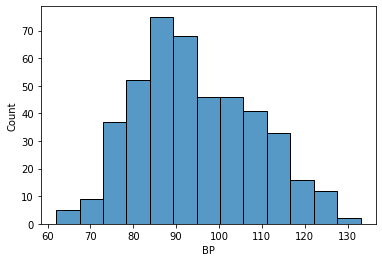

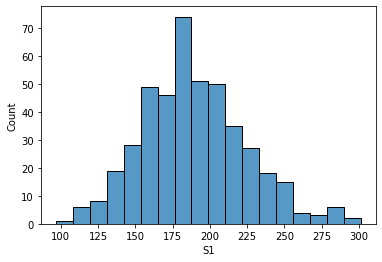

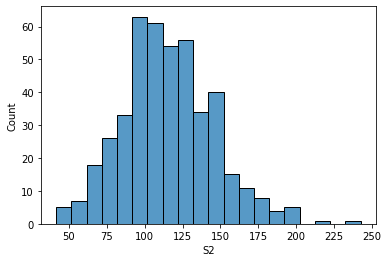

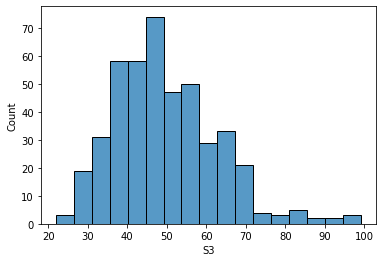

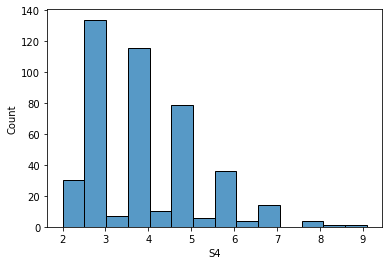

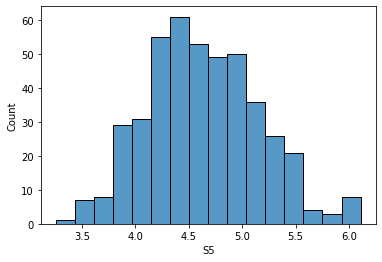

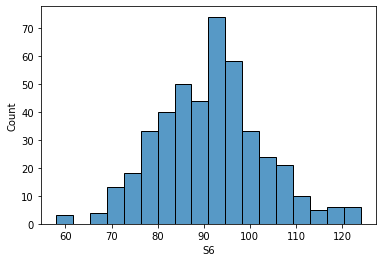

In [12]:
# Plot the distribution plot for the features
# AGE	SEX	BMI	BP	S1	S2	S3	S4	S5	S6	
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['AGE'])
plt.show()
sns.histplot(df['SEX'])
plt.show()
sns.histplot(df['BP'])
plt.show()
sns.histplot(df['S1'])
plt.show()
sns.histplot(df['S2'])
plt.show()
sns.histplot(df['S3'])
plt.show()
sns.histplot(df['S4'])
plt.show()
sns.histplot(df['S5'])
plt.show()
sns.histplot(df['S6'])
plt.show()

<AxesSubplot:>

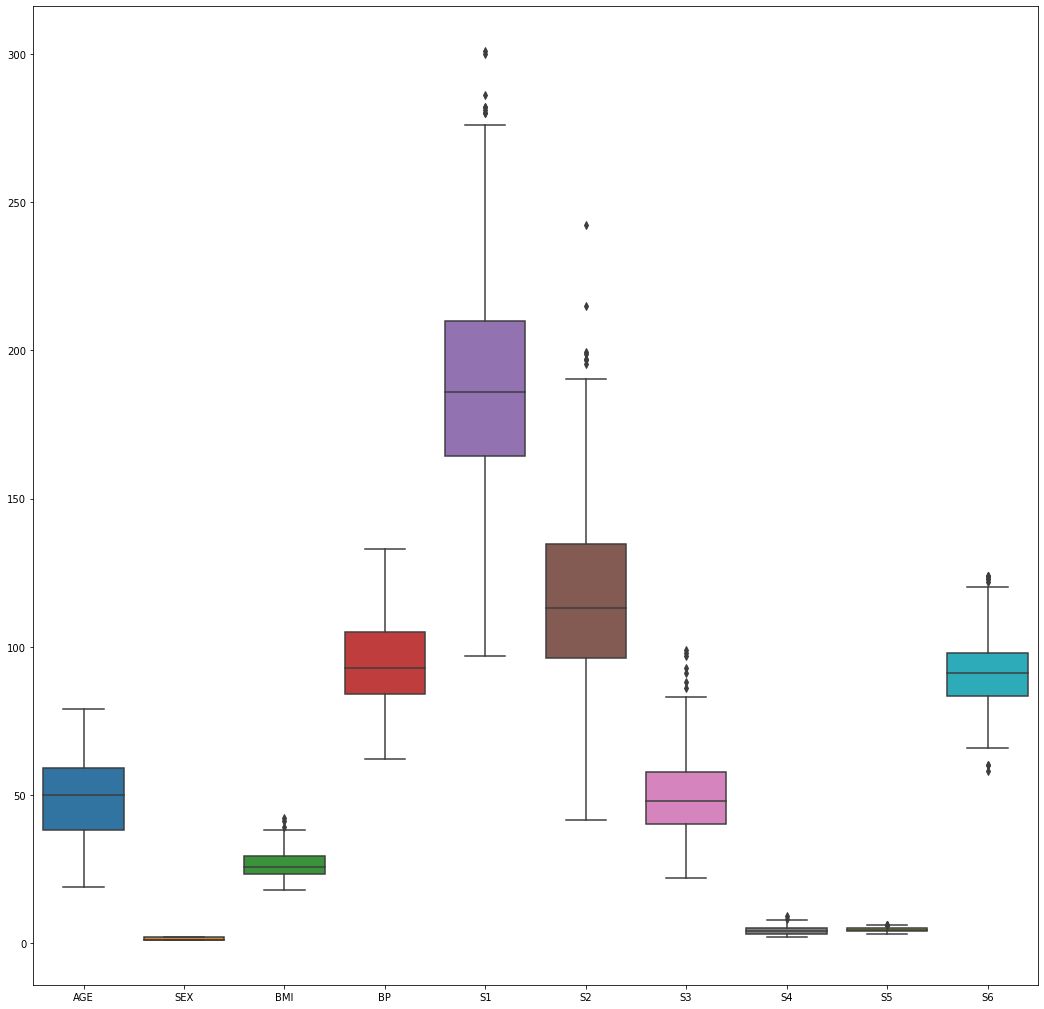

In [13]:
# 1.2 Find outliers.
# Outliers are the values of variables, that lies far away from other values
# Diff methods Inter quartile range, Boxplots, DBSCAN
#Method - Boxplots
plt.figure(figsize = (18,18))
sns.boxplot(data= features)


<AxesSubplot:>

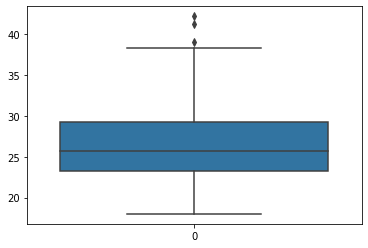

In [14]:
#Method — Boxplots
sns.boxplot(data= features['BMI'])

<AxesSubplot:>

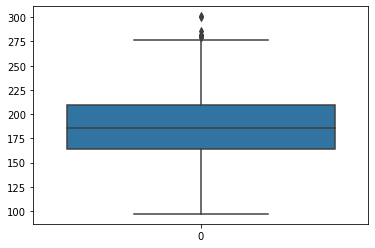

In [15]:
#Method — Boxplots
sns.boxplot(data= features['S1'])

     AGE  SEX   BMI      BP   S1     S2    S3   S4      S5   S6    Y
23    61    2  32.0  103.67  210   85.2  35.0  6.0  6.1070  124  245
117   65    1  24.4  120.00  222  135.6  37.0  6.0  5.5094  124  281
141   41    1  30.8   81.00  214  152.0  28.0  7.6  5.1358  123  317
168   49    2  31.9   94.00  234  155.8  34.0  7.0  5.3982  122  268
350   41    2  32.0  126.00  198  104.2  49.0  4.0  5.4116  124  243
428   62    2  34.6  120.00  215  129.2  43.0  5.0  5.3660  123  310


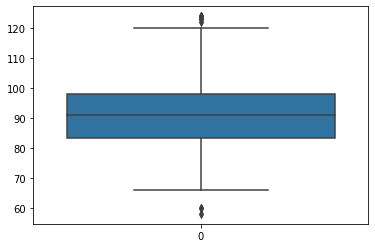

In [16]:
#Method 2 — Boxplots
sns.boxplot(data= features['S6'])

val = df[df.S6 > 120]
print(val)

In [17]:
# Removing outliers
# 1) find outliers using IQR

def find_outliers(df, feature):
    #Get first quartile 
    Q1 = df[feature].quantile(0.25)
    #Get third quartile 
    Q3 = df[feature].quantile(0.75)   
    IQR = Q3 - Q1
    #find lower bound by using formula
    lower_bound = Q1 - IQR * 1.5
     #find upper bound
    upper_bound = Q3 + IQR * 1.5
    # find out the row indices having outliers (values less than lower bound and greater than upper bound)
    row_indices = df.index[ (df[feature] < lower_bound) | (df[feature] > upper_bound) ]
    return row_indices

In [18]:
outlier_rows = []

for feature in features.columns:
    #print(feature)
    print(find_outliers(df, feature))
    outlier_rows.extend(find_outliers(df, feature))    
    

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([256, 366, 367], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([123, 161, 202, 230, 248, 276, 287, 346], dtype='int64')
Int64Index([123, 161, 230, 248, 287, 346, 376], dtype='int64')
Int64Index([35, 58, 260, 261, 269, 286, 441], dtype='int64')
Int64Index([123, 322], dtype='int64')
Int64Index([23, 169, 322, 353], dtype='int64')
Int64Index([23, 84, 117, 141, 168, 245, 350, 406, 428], dtype='int64')


In [19]:
print(sorted(outlier_rows))

[23, 23, 35, 58, 84, 117, 123, 123, 123, 141, 161, 161, 168, 169, 202, 230, 230, 245, 248, 248, 256, 260, 261, 269, 276, 286, 287, 287, 322, 322, 346, 346, 350, 353, 366, 367, 376, 406, 428, 441]


In [20]:
# Remove the duplicate row indices
unique_outliers_rows = sorted(set(outlier_rows))
print(unique_outliers_rows)

[23, 35, 58, 84, 117, 123, 141, 161, 168, 169, 202, 230, 245, 248, 256, 260, 261, 269, 276, 286, 287, 322, 346, 350, 353, 366, 367, 376, 406, 428, 441]


In [21]:
# Remove the outliers
cleaned_df = df.drop(unique_outliers_rows, axis = 0)

In [22]:
df.shape

(442, 11)

In [23]:
# check record count after removing outliers
cleaned_df.shape

(411, 11)

### 1.3) Transform data – all entries should be numeric.
#### All the entries are already numeric

In [24]:
# 2) List of type od data used
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

### 3- Perform EDA on data.
### 3.1 Present dependencies and correlations among the various features in the data.


#### Dependencies and Correlation - 

In [25]:
# correlation - Defines how correlated the varibles with the target
# High corretion = higher the impact on target value
correlation = cleaned_df.corr(method='pearson', min_periods=1)
correlation

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.175548,0.218316,0.332747,0.290889,0.254210,-0.108598,0.244203,0.294916,0.331997,0.199981
SEX,0.175548,1.000000,0.044406,0.236720,0.021653,0.132765,-0.383055,0.333269,0.134441,0.177558,0.024965
BMI,0.218316,0.044406,1.000000,0.415839,0.238455,0.230992,-0.335251,0.374908,0.441466,0.352103,0.568104
BP,0.332747,0.236720,0.415839,1.000000,0.246225,0.190394,-0.169396,0.252725,0.381064,0.374811,0.437351
S1,0.290889,0.021653,0.238455,0.246225,1.000000,0.903646,0.060475,0.523832,0.485712,0.299779,0.198914
S2,0.254210,0.132765,0.230992,0.190394,0.903646,1.000000,-0.181719,0.653139,0.297595,0.270555,0.151457
S3,-0.108598,-0.383055,-0.335251,-0.169396,0.060475,-0.181719,1.000000,-0.750403,-0.410116,-0.240353,-0.382829
S4,0.244203,0.333269,0.374908,0.252725,0.523832,0.653139,-0.750403,1.000000,0.596846,0.356825,0.409703
S5,0.294916,0.134441,0.441466,0.381064,0.485712,0.297595,-0.410116,0.596846,1.000000,0.419098,0.558874
S6,0.331997,0.177558,0.352103,0.374811,0.299779,0.270555,-0.240353,0.356825,0.419098,1.000000,0.341035


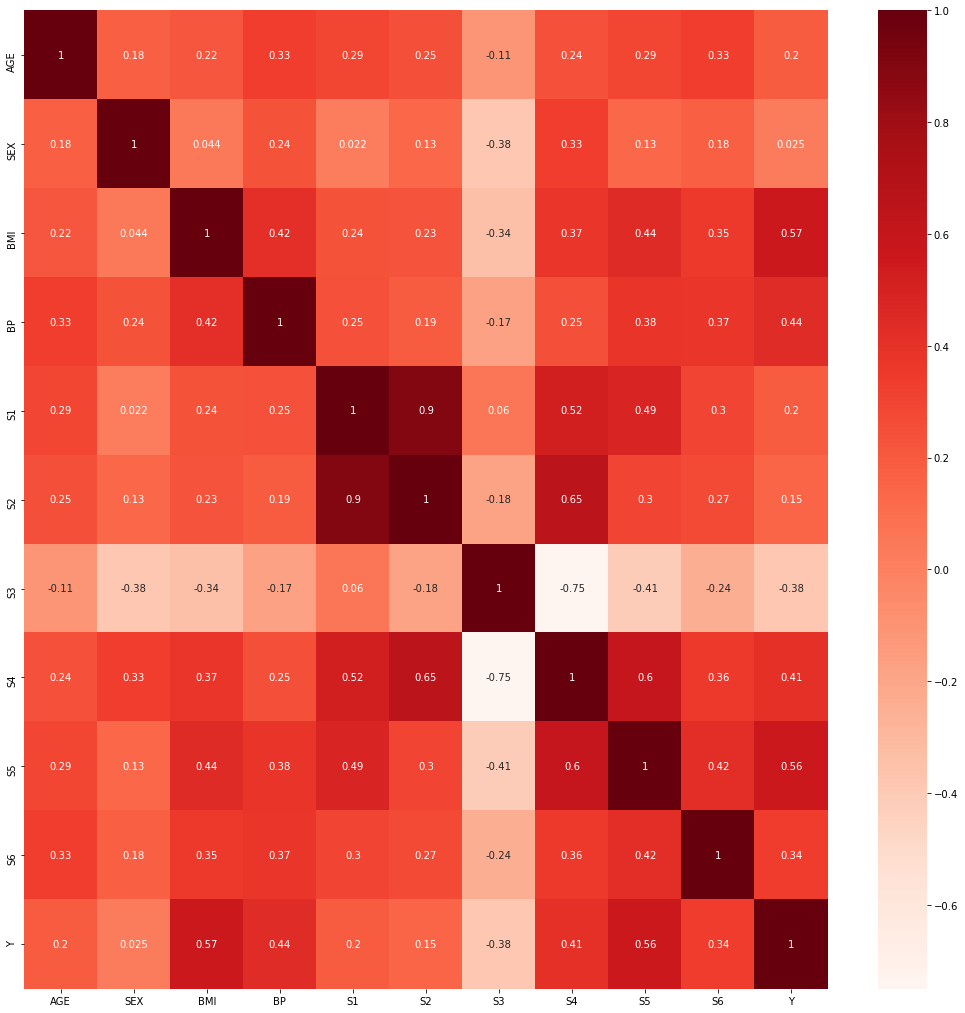

In [26]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cleaned_df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

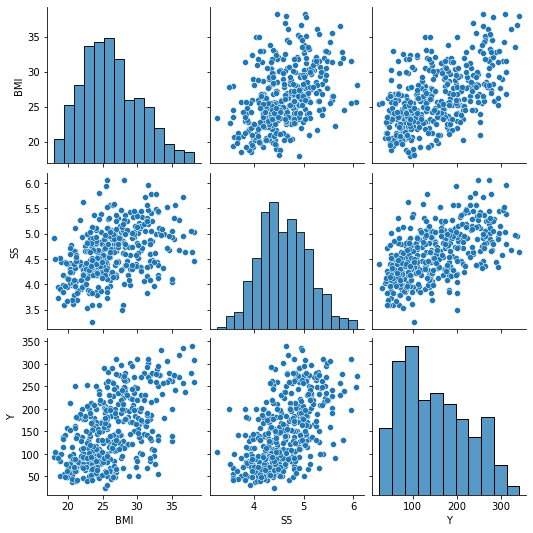

In [30]:
df_pair_plot = sns.pairplot(high_corr_df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pair plot of influential factors for Y')

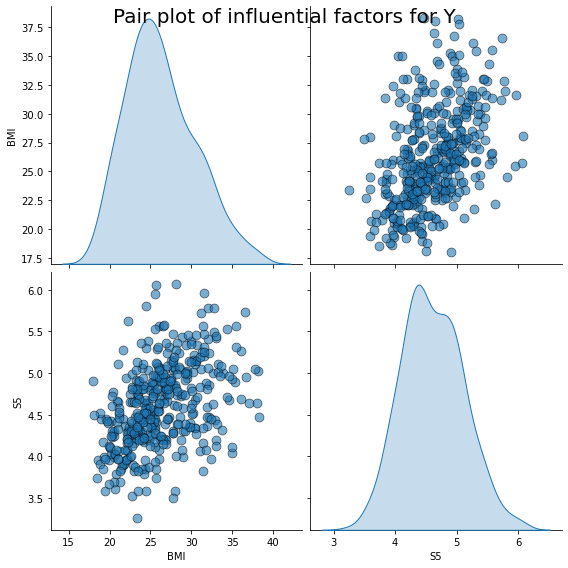

In [31]:
sns.pairplot(
    cleaned_df[cleaned_df["Y"] >  5],
vars = ["BMI", "S5"], diag_kind = "kde",
plot_kws = { "alpha": 0.6, "s": 80, "edgecolor" : "k"},
size =4
)

#Title
plt.suptitle("Pair plot of influential factors for Y", size = 20)


### List the most variables (Feature Importance) that will affect the target label.

In [38]:
# I used another method to find the most importance features

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
# Used SelectKBest algorithm to find the best features
selectKBest_model = SelectKBest(score_func=chi2, k=9)
top_features = selectKBest_model.fit(features, label)

In [41]:
top_features

SelectKBest(k=9, score_func=<function chi2 at 0x7fdcbbcb8820>)

In [42]:
top_features.scores_

array([ 787.40419678,   37.59830508,  213.75064948,  527.750447  ,
       1291.92433692, 1604.79317879,  892.18739539,  106.34882   ,
         17.04516465,  335.98749039])

In [43]:
scores_df = pd.DataFrame({'column': features.columns, 'score': top_features.scores_})

In [44]:
scores_df

,column,score
0,AGE,787.404197
1,SEX,37.598305
2,BMI,213.750649
3,BP,527.750447
4,S1,1291.924337
5,S2,1604.793179
6,S3,892.187395
7,S4,106.348820
8,S5,17.045165
9,S6,335.987490


In [45]:
scores_df.nlargest(5, 'score')

,column,score
5,S2,1604.793179
4,S1,1291.924337
6,S3,892.187395
0,AGE,787.404197
3,BP,527.750447
